In [2]:
#library
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data05_boston.csv')

In [38]:
from sklearn.linear_model import LinearRegression
v = df['lstat'] # 1차원 벡터
X = df[['lstat','age','rm']] #2차원 행렬
y = df['medv']

In [39]:
#v.head(5)
X.head(5)

,lstat,age,rm
0,4.98,65.2,6.575
1,9.14,78.9,6.421
2,4.03,61.1,7.185
3,2.94,45.8,6.998
4,5.33,54.2,7.147


In [40]:
lm = LinearRegression()
lm.fit(X,y) # b0, b1을 구함

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
lm.intercept_

-1.1753114948264525

In [42]:
lm.coef_

array([-0.66851305,  0.00909133,  5.01913348])

medv ~ 34.55 - 0.95lsat 모델을 만든 것이다

In [43]:
lm.intercept_ + lm.coef_[0]*10

-7.860442010937

In [45]:
yhat = lm.predict(X)

In [46]:
yhat

array([ 2.90890507e+01,  2.56596410e+01,  3.27485351e+01,  3.23995390e+01,
        3.16260109e+01,  2.81484247e+01,  2.12955842e+01,  1.78744320e+01,
        7.98796623e+00,  1.83089378e+01,  1.80179230e+01,  2.08671644e+01,
        1.82345873e+01,  2.37234398e+01,  2.33305994e+01,  2.29576677e+01,
        2.44808057e+01,  1.98249730e+01,  1.87269058e+01,  2.06602860e+01,
        1.36209769e+01,  2.03292306e+01,  1.79713167e+01,  1.56200047e+01,
        1.85167664e+01,  1.66687931e+01,  1.89211800e+01,  1.84307930e+01,
        2.37252147e+01,  2.51072719e+01,  1.32460970e+01,  2.14925895e+01,
        1.09095249e+01,  1.60352301e+01,  1.67047203e+01,  2.27520296e+01,
        2.10719207e+01,  2.27010500e+01,  2.22713597e+01,  2.92360884e+01,
        3.28990692e+01,  2.95949839e+01,  2.59636649e+01,  2.50838831e+01,
        2.32651630e+01,  2.08251735e+01,  1.87086763e+01,  1.72993265e+01,
        6.19250654e+00,  1.66756251e+01,  2.01777546e+01,  2.37853653e+01,
        2.81663447e+01,  

In [47]:
e = y-yhat

In [48]:
e.head(5)

0   -5.089051
1   -4.059641
2    1.951465
3    1.000461
4    4.573989
Name: medv, dtype: float64

In [49]:
r2 = lm.score(X,y) #R2

In [50]:
rmse = np.sqrt((e**2).mean()) #RMSE

In [51]:
rmse

5.520197387308067

In [52]:
r2

0.6390341221591789

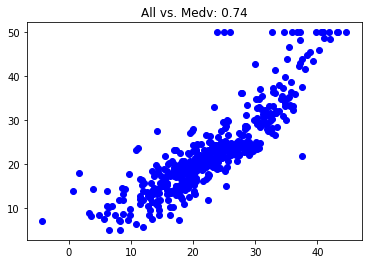

In [58]:
plt.plot(yhat,y,'bo')
plt.title('All vs. Medv: %.2f' % r2)
plt.show()

In [57]:
X = df.iloc[:,0:13]
y = df['medv']
lm = LinearRegression()
lm.fit(X,y)
lm.coef_
lm.intercept_
yhat = lm.predict(X)
e = y-yhat
r2 = lm.score(X,y) #R2
rmse = np.sqrt((e**2).mean())

In [59]:
import statsmodels.api as sm

In [61]:
X = df.iloc[:,0:13]
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [63]:
X = sm.add_constant(X)

In [64]:
X.head()

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [65]:
y = df['medv']

In [66]:
f = sm.OLS(y,X) # 분석을 할 수 있는 공간을 만들어 준다.
r = f.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 17 Dec 2018   Prob (F-statistic):          6.72e-135
Time:                        14:44:27   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
r.pvalues

const      3.283438e-12
crim       1.086810e-03
zn         7.781097e-04
indus      7.382881e-01
chas       1.925030e-03
nox        4.245644e-06
rm         1.979441e-18
age        9.582293e-01
dis        6.013491e-13
rad        5.070529e-06
tax        1.111637e-03
ptratio    1.308835e-12
black      5.728592e-04
lstat      7.776912e-23
dtype: float64

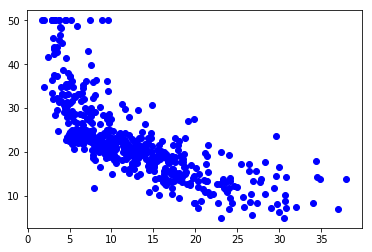

In [68]:
plt.plot(df['lstat'],df['medv'],'bo')

In [69]:
X = df[['lstat']]

In [70]:
lstat2 = X['lstat'] ** 2

In [71]:
X['lstat2'] = lstat2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
X.head()

,lstat,lstat2
0,4.98,24.8004
1,9.14,83.5396
2,4.03,16.2409
3,2.94,8.6436
4,5.33,28.4089


In [73]:
X = sm.add_constant(X)

In [74]:
f = sm.OLS(y,X) # 분석을 할 수 있는 공간을 만들어 준다.
r = f.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 17 Dec 2018   Prob (F-statistic):          1.56e-112
Time:                        15:10:21   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.000      41.149      44.575
lstat         -2.3328      0.124    -18.843      0.000      -2.576      -2.090
lstat2         0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

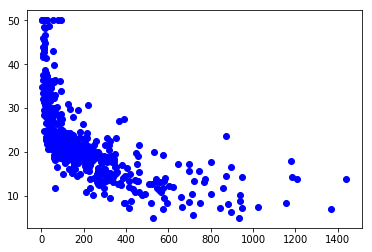

In [76]:
plt.plot(X['lstat2'],df['medv'],'bo')

In [77]:
X = df[ ['lstat','rm'] ]
X['lstat_rm'] = X['lstat'] * X['rm']
X = sm.add_constant(X)
y = df['medv']
f = sm.OLS(y,X)
r = f.fit()
r.summary()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     476.9
Date:                Mon, 17 Dec 2018   Prob (F-statistic):          1.75e-146
Time:                        15:11:59   Log-Likelihood:                -1499.2
No. Observations:                 506   AIC:                             3006.
Df Residuals:                     502   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.1245      3.342     -8.713      0.000     -35.692     -22.558
lstat          2.1940      0.206     10.666      0.000       1.790       2.598
rm             9.7013      0.500     19.393      0.000       8.718      10.684
lstat_rm      -0.4849      0.035    -14.018      0.000      -0.553      -0.417
==============================================================================
Omnibus:                      223.968   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2182.462
Skew:                           1.666   Prob(JB):                         0.00
Kurtosis:                      12.613   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
r2

0.7406426641094094

In [79]:
np.random.seed(1)
train_idx = list(np.random.choice(np.arange(df.shape[0]),300,replace=False))
test_idx = list(set(np.arange(df.shape[0])).difference(train_idx))
dftrain = df.iloc[train_idx,:]
dftest = df.iloc[test_idx,:]


xtrain = dftrain.iloc[:,0:13]
ytrain = dftrain['medv']
xtest = dftest.iloc[:,0:13]
ytest = dftest['medv']

In [80]:
xtrain.shape

(300, 13)

In [81]:
ytrain.shape

(300,)

In [82]:
xtest.shape

(206, 13)

In [83]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
lm.coef_

array([-1.35970186e-01,  3.06598955e-02,  6.99772002e-03,  3.45355252e+00,
       -1.95123460e+01,  4.24733320e+00, -1.34750695e-02, -1.63758009e+00,
        3.19233852e-01, -1.34437827e-02, -1.03757188e+00,  1.05253786e-02,
       -4.57529852e-01])

In [85]:
lm.intercept_

37.03431431291627

In [86]:
yhat_train = lm.predict(xtrain)

In [87]:
rmse_train = np.sqrt(((ytrain - yhat_train)**2).mean())

In [88]:
r2_train = lm.score(xtrain,ytrain)

In [89]:
r2_train

0.7634762341229839